<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter 2 사이킷런으로 시작하는 머신러닝

1. 사이킷런 소개와 특징

  파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리

사이킷런의 특징
* 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공
* 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공
* 오랜 기간 실전 환경에서 검증됐으며 매우 많은 환경에서 사용되는 성숙한 라이브러리


In [ ]:
import sklearn
print(sklearn.__version__)  # 버전 확인

1.2.2


2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

붓꽃 데이터 세트 -> 붓꽃의 품종 분류하기

붓꽃 데이터 피처: Sepal length(꽃잎의 길이), Sepal width(꽃잎의 너비), Petallength(꽃받침의 길이), Petal width(꽃받침의 너비)

붓꽃 데이터 품종: Setosa, Vesicolor, Virginica

---

**분류(Classification)**는 대표적인 지도학습 방법의 하나

지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다 
즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식


모듈명은 sklearn으로 시작

**sklearn.datasets**: 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

**sklearn.tree**: 트리 기반 ML 알고리즘을 구현한 클래스의 모임

**sklearn.model_selection**: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

+) 하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭, 머신러닝 알고리즘의 성능 튜닝 가능

>* 붓꽃 데이터 세트 생성 = **load_iris()**
>* ML 알고리즘 = 의사 결정 트리 알고리즘 **DecisionTreeClassifier**
>* 학습 데이터와 테스트 데이터로 분리 = **train_test_split()**

In [ ]:
# 모듈 임포트
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


붓꽃 데이터 세트로 분류 예측 프로세스

1) **데이터 세트 분리**: 데이터를 학습 데이터와 테스트 데이터로 분리한다
* 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하므로 학습용 데이터와 테스트용 데이터는 반드시 분리해야 한다
* train_test_split(): 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 반환

  (ex. test_size=0.2로 입력 파라미터 설정하면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터 분할)

* random_state: 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

  random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있음(숫자 자체는 어떤 값으로 지정해도 상관x, random 값을 만드는 seed와 같은 의미)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)
# iris_data: 피처 데이터 세트, iris_label: 레이블(Label) 데이터 세트

2) **모델 학습**: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다
* 사이킷런의 의사 결정 트리 클래스 DecisionTreeClassifier를 객체로 생성
* 생성된 객체의 fit()메서드에 학습용 피처 데이터 속성(X_train)과 결정값 데이터 세트(y_train) 입력해 호출하면 학습 수행

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

3) **예측 수행**: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측한다
* 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며 일반적으로 테스트 데이터 세트를 이용
* DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환 


In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

4) **평가**: 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다
* 정확도: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
* accuracy_score()

  첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트 입력


In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.933333


3. 사이킷런의 기반 프레임워크 익히기

Estimator 이해 및 fit(), predict() 메서드

사이킷런은 ML 모델 학습을 위해 fit()을, 학습된 모델의 예측을 위해 predict() 메서드 제공

지도학습의 두가지 분류(통칭: Estimator)
* 분류 알고리즘을 구현한 클래스: Classifier
* 회귀 알고리즘을 구현한 클래스: Regressor


비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스도 대부분 fit()과 transform() 적용
* fit(): 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
* transform(): 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업 수행

사이킷런의 주요 모듈

|분류|모듈명|설명|
|:---|:---|:---|
|예제 데이터|sklearn.datasets|사이킷런에 내장되어 예제로 제공하는 데이터 세트|
|피처 처리|sklearn.preprocessing|데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)|
| |sklearn.feature_selection|알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공|
| |sklearn.feature_extraction|텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨|
|피처 처리 & 차원 축소|sklearn.decomposition|차원 축소와 관련한 알고리즘을 지원하는 모듈|
|데이터 분리, 검증 & 파라미터 튜닝|sklearn.model_selection|교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등의 API 제공|
|평가|sklearn.metrics|분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공|
|ML 알고리즘|sklearn.ensemble|앙상블 알고리즘 제공(랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공)|
| |sklearn.linear_model|주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원, 또한 SGD 관련 알고리즘도 제공|
| |sklearn.naive_bayes|나이브 베이즈 알고리즘 제공(가우시안 NB, 다항 분포 NB 등)|
| |sklearn.neighbors|최근접 이웃 알고리즘 제공(K-NN 등)|
| |sklearn.svm|서포트 벡터 머신 알고리즘 제공|
| |sklearn.tree|의사 결정 트리 알고리즘 제공|
| |sklearn.cluster|비지도 클러스터링 알고리즘 제공(K-평균, 계층형, DBSCAN 등)|
|유틸리티|sklearn.pipeline|피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공|


**내장된 예제 데이터 세트**

* 분류나 회귀 연습용 예제 데이터

|API명|설명|
|:---|:---|
|datasets.load_boston()|회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트|
|datasets.load_breast_cancer()|분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트|
|datasets.load_diabets()|회귀 용도이며, 당뇨 데이터 세트|
|datasets.load_digits()|분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트|
|datasets.load_iris()|분류 용도이며, 붓꽃에 대한 피처를 가진 세트|

* fetch 계열의 명령: 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터(최초 사용 시에 인터넷에 연결돼 있지 않으면 사용x)
  * fetch_covtype(): 회귀 분석용 토지 조사 자료
  * fetch_20newsgroups(): 뉴스 그룹 텍스트 자료
  * fetch_olivetti_faces(): 얼굴 이미지 자료
  * fetch_lfw_people(): 얼굴 이미지 자료
  * fetch_lfw_pairs(): 얼굴 이미지 자료
  * fetch_rcv1(): 로이터 뉴스 말뭉치
  * fetch_mldata(): ML 웹사이트에서 다운로드

* 분류와 클러스터링을 위한 표본 데이터 생성기

|API명|설명|
|:---|:---|
|datasets.make_classifications()|분류를 위한 데이터 세트를 만든다 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 준다|
|datasets.make_blobs()|클러스터링을 위한 데이터 세트를 무작위로 생성해 준다 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 준다|

* 연습용 예제 데이터 구성
  * data: 피처의 데이터 세트(ndarray 타입)
  * target: 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트(ndarray 타입)
  * target_names: 개별 레이블의 이름(ndarray/list 타입)
  * feature_names: 피처의 이름(ndarray/list 타입)
  * DESCR: 데이터 세트에 대한 설명과 각 피처의 설명(스트링 타입)


In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
# key 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

4. Model Selection 모듈 소개

학습/테스트 데이터 세트 분리 - train_test_split()

In [ ]:
# 학습 데이터 세트로 학습, 예측 모두 진행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))
# 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문에 정확도 100% - 의미x

예측 정확도: 1.0


* test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정(디폴트는 0.25)
* train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정(잘 사용되지 않음)
* shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정(디폴트는 True), 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
* random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값, random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 생성
* train_test_split()의 반환값은 튜플 형태이며 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환됨

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.955556


교차 검증

* 앞의 학습, 예측 방법은 과적함(Overfitting)에 취약함
  
  과적합: 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것

* 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
* 각 세트에서 수행한 평과 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 함


K 폴드 교차 검증
* 가장 보편적으로 사용되는 교차 검증 기법
* K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

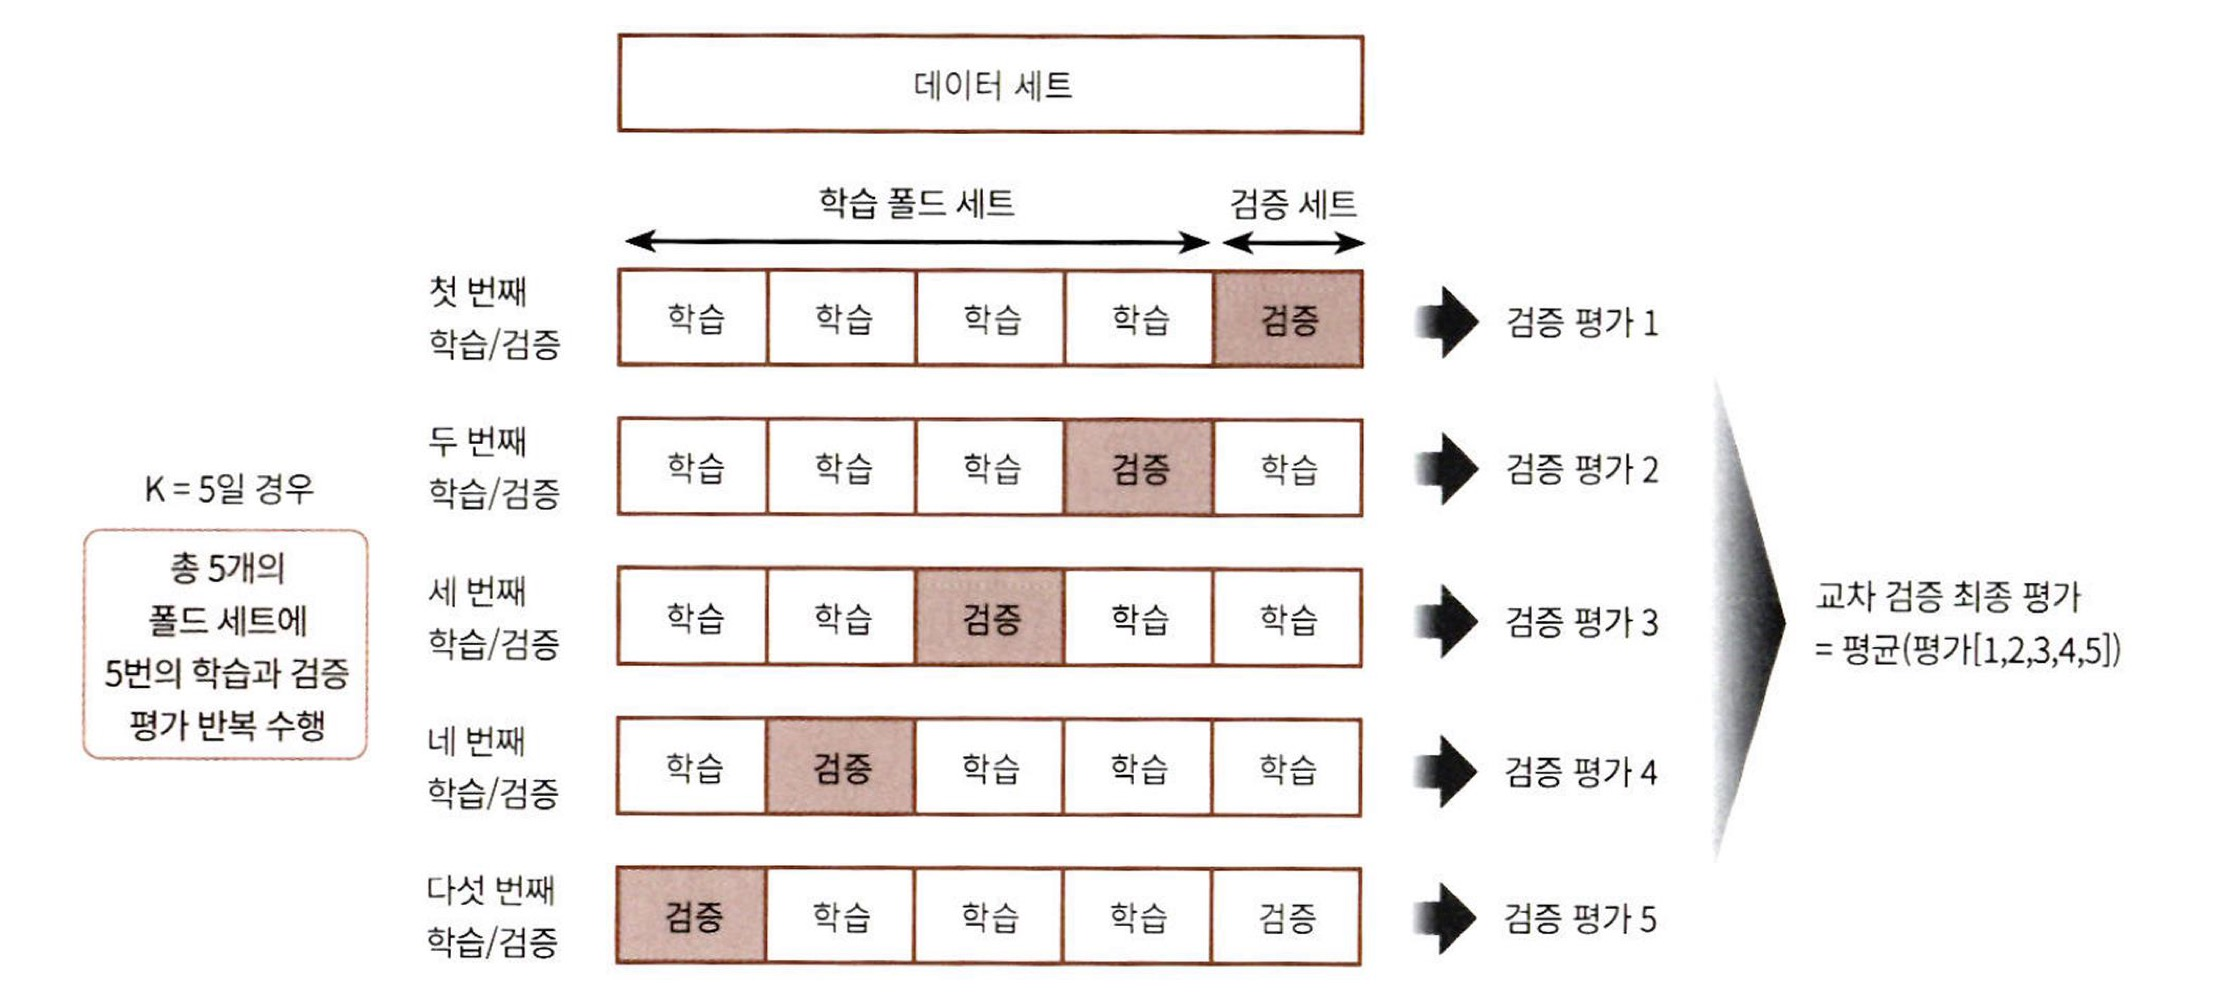

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [ ]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  # 개별 iteration별 정확도를 합하여 평균 정확도 계산
  print('\n## 평균 검정 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검정 정확도: 1.0

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검정 정확도: 0.98335

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검정 정확도: 0.9444666666666667

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검정 정확도: 0.941675

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검정 정확도: 0.9


Stratified K 폴드
* 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
* K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 줌(특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우칠 때)
* 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출
# 예측 정확도 0

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


동일한 분할을 StratifiedKFold로 수행

In [ ]:
# StratifiedKFold는 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 줌

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):  # split 안에 피처 데이터, 레이블 데이터 세트 필요
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    
# 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


교차 검증을 보다 간편하게 - cross_val_score()

* KFold로 데이터 학습

  1) 폴드 세트 설정
  2) for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
  3) 반복적으로 학습과 예측을 수행하고 예측 성능 반환

* cross_val_score(): 위의 과정을 한꺼번에 수행해주는 API
  * estimator: 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor을 의미
  * x: 피처 데이터 세트
  * y: 레이블 데이터 ㅔㅅ트
  * scoring: 예측 성능 평가 지표 기술
  * cv: 교차 검증 폴드 수

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
* estimator: classifier, regressor, pipeline이 사용될 수 있음
* param_grid: key + 리스트 값을 가지는 딕셔너리가 주어짐, estimator의 튜닝을 위해 파라미터며오가 사용될 여러 파라미터 값을 지정
* scoring: 예측 성능을 측정할 평가 방법을 지정하며 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하거나 별도의 성능 평가 지표 함수도 지정 가능
* cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
* refit: 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default임 True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


* params: 수행할 때마다 적용된 개별 하이퍼 파라미터 값
* rank_test_score: 하이퍼 파라미터별로 성능이 좋은 score 순위(1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터)
* mean_test_score: 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [ ]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
